# Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from sklearn.metrics import zero_one_loss

%matplotlib inline

In [38]:
from utils.data_gen import compute_bayes_risk_binary, compute_bayes_risk_binary_label_shift,\
    generate_2d_example

from utils.concentrations import compute_hoeffding_ci_lower_limit,\
    compute_hoeffding_ci_upper_limit
from utils.concentrations import compute_pm_bernstein_fixed_time_upper_limit,\
    compute_pm_bernstein_fixed_time_lower_limit

from utils.concentrations import compute_pm_bernstein_lower_limit,compute_pm_bernstein_upper_limit
from utils.concentrations import compute_pm_hoeffding_upper_limit, compute_pm_hoeffding_lower_limit

In [3]:
sns.set(style="whitegrid",
        font_scale=1.4,
        rc={
            "lines.linewidth": 2,
#             "axes.facecolor": ".9",
            'figure.figsize': (12, 6)
        })
sns.set_palette('Set2')
matplotlib.rcParams['text.usetex'] = True

In [4]:
legend_dict = ['$\{0\}$', '$\{1\}$']
clr1 =  np.array([193, 142, 206]) / 256
clr2 = np.array([125, 225, 125]) / 256
colors = [clr1,clr2]

In [5]:
%load_ext autoreload
%autoreload 2

## well-separated

In [28]:
mu_1 = np.array([2,0])
mu_0 = np.array([-2,0])

In [29]:
X,y = generate_2d_example(0.5, mu_0, mu_1, 1000)

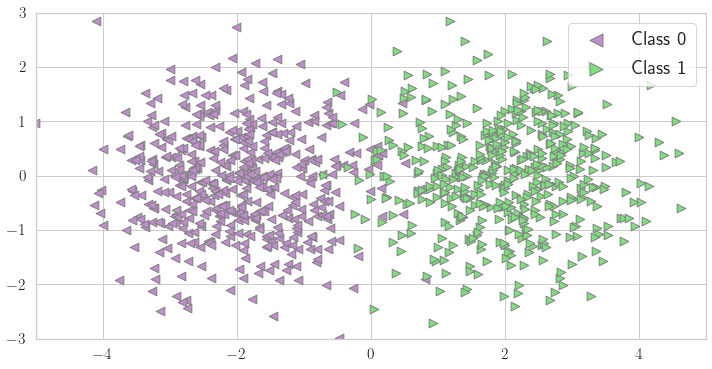

In [30]:
plt.figure(figsize=[12, 6])
plt.scatter(X[y == 0, 0],
            X[y == 0, 1],
            edgecolor="gray",
            marker='<',
            label= 'Class 0',
            s=75,
            c=colors[0].reshape(1, -1))
plt.scatter(X[y == 1, 0],
            X[y == 1, 1],
            edgecolor="gray",
            marker='>',
            label= 'Class 1',
            s=75,
            c=colors[1].reshape(1, -1))
plt.legend(loc=1, markerscale=1.5, prop={'size': 20})
plt.xlim([-5,5])
plt.ylim([-3,3])
plt.show()
# plt.savefig('img/well_sep_data_vis.pdf', bbox_inches='tight')

In [31]:
prob_class_1 = np.linspace(0.1,0.9,20)

In [32]:
risks_source_separable = list()
risks_target_separable_25 = list()
risks_target_separable_5 = list()
risks_target_separable_75 = list()

In [33]:
for cur_prob_class_1 in prob_class_1:
    risks_source_separable+=[compute_bayes_risk_binary(cur_prob_class_1,mu_1,mu_0)[0][0]]

for cur_prob_class_1 in prob_class_1:
    risks_target_separable_25 += [
        compute_bayes_risk_binary_label_shift(0.25, cur_prob_class_1, mu_1,
                                              mu_0)[0][0]
    ]
    
for cur_prob_class_1 in prob_class_1:
    risks_target_separable_5 += [
        compute_bayes_risk_binary_label_shift(0.5, cur_prob_class_1, mu_1,
                                              mu_0)[0][0]
    ]
    
for cur_prob_class_1 in prob_class_1:
    risks_target_separable_75 += [
        compute_bayes_risk_binary_label_shift(0.75, cur_prob_class_1, mu_1,
                                              mu_0)[0][0]
    ]

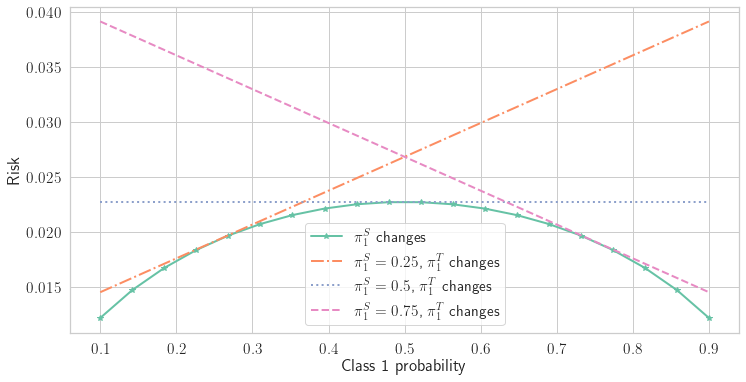

In [34]:
plt.plot(prob_class_1,risks_source_separable, marker='*', label = r'$\pi_1^S$ changes')
plt.plot(prob_class_1,risks_target_separable_25,linestyle='-.', label = r'$\pi^S_1=0.25$, $\pi_1^T$ changes')
plt.plot(prob_class_1,risks_target_separable_5,linestyle=':', label = r'$\pi^S_1=0.5$, $\pi_1^T$ changes')
plt.plot(prob_class_1,risks_target_separable_75,linestyle='--', label = r'$\pi^S_1=0.75$, $\pi_1^T$ changes')
plt.legend()
plt.xlabel('Class 1 probability')
plt.ylabel('Risk')
# plt.show()
plt.savefig('img/risk_well_separable.pdf', bbox_inches='tight')

## largely-intersecting

In [8]:
mu_1 = np.array([1,0])
mu_0 = np.array([-1,0])
prob_class_1 = np.linspace(0.1,0.9,20)

In [9]:
X,y = generate_2d_example(0.5, mu_0, mu_1, 1000)

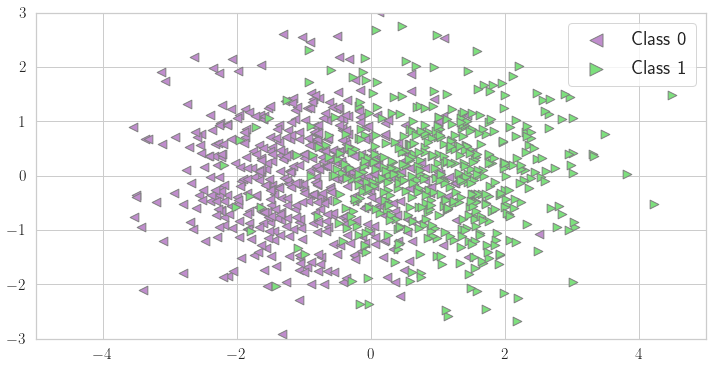

In [37]:
plt.figure(figsize=[12, 6])
plt.scatter(X[y == 0, 0],
            X[y == 0, 1],
            edgecolor="gray",
            marker='<',
            label= 'Class 0',
            s=75,
            c=colors[0].reshape(1, -1))
plt.scatter(X[y == 1, 0],
            X[y == 1, 1],
            edgecolor="gray",
            marker='>',
            label= 'Class 1',
            s=75,
            c=colors[1].reshape(1, -1))
plt.legend(loc=1, markerscale=1.5, prop={'size': 20})
plt.xlim([-5,5])
plt.ylim([-3,3])
plt.show()
# plt.savefig('img/not_well_sep_data_vis.pdf', bbox_inches='tight')

In [38]:
prob_class_1 = np.linspace(0.1,0.9,20)

In [39]:
risks_source_separable = list()
risks_target_separable_25 = list()
risks_target_separable_5 = list()
risks_target_separable_75 = list()

In [40]:
for cur_prob_class_1 in prob_class_1:
    risks_source_separable+=[compute_bayes_risk_binary(cur_prob_class_1,mu_1,mu_0)[0][0]]

for cur_prob_class_1 in prob_class_1:
    risks_target_separable_25 += [
        compute_bayes_risk_binary_label_shift(0.25, cur_prob_class_1, mu_1,
                                              mu_0)[0][0]
    ]
    
for cur_prob_class_1 in prob_class_1:
    risks_target_separable_5 += [
        compute_bayes_risk_binary_label_shift(0.5, cur_prob_class_1, mu_1,
                                              mu_0)[0][0]
    ]
    
for cur_prob_class_1 in prob_class_1:
    risks_target_separable_75 += [
        compute_bayes_risk_binary_label_shift(0.75, cur_prob_class_1, mu_1,
                                              mu_0)[0][0]
    ]

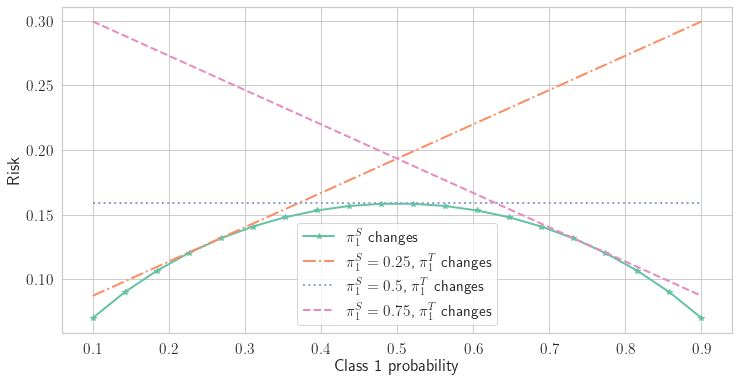

In [41]:
plt.plot(prob_class_1,risks_source_separable, marker='*', label = r'$\pi_1^S$ changes')
plt.plot(prob_class_1,risks_target_separable_25,linestyle='-.', label = r'$\pi^S_1=0.25$, $\pi_1^T$ changes')
plt.plot(prob_class_1,risks_target_separable_5,linestyle=':', label = r'$\pi^S_1=0.5$, $\pi_1^T$ changes')
plt.plot(prob_class_1,risks_target_separable_75,linestyle='--', label = r'$\pi^S_1=0.75$, $\pi_1^T$ changes')
plt.legend()
plt.xlabel('Class 1 probability')
plt.ylabel('Risk')
# plt.show()
plt.savefig('img/risk_not_well_separable.pdf', bbox_inches='tight')

# Oracle predictor

In [10]:
from utils.data_gen import LDA_predictor

In [11]:
mu_1 = np.array([1,0])
mu_0 = np.array([-1,0])
prob_class_1 = 0.5
prob_class_0 = 1 - prob_class_1
cov = np.eye(2)

In [123]:
X,y = generate_2d_example(0.5, mu_0, mu_1, 5000)

In [124]:
clf = LDA_predictor()

clf.mean_class_0=mu_0
clf.mean_class_1=mu_1
clf.class_0_prior = prob_class_0
clf.class_1_prior = prob_class_1


In [125]:
clf.score(X,y)

0.8432

In [126]:
compute_bayes_risk_binary_label_shift(0.5, 0.5, mu_1,
                                              mu_0)[0][0]

0.15865525393145707

In [127]:
pred_y = clf.predict(X)
z = pred_y != y

# concentrations

In [128]:
compute_hoeffding_ci_lower_limit(z,0.05)

0.1394918161739802

In [129]:
compute_hoeffding_ci_upper_limit(z,0.05)

0.1741081838260275

In [130]:
compute_pm_bernstein_fixed_time_lower_limit(z,0.05)

0.15745732776196597

In [131]:
compute_pm_bernstein_fixed_time_upper_limit(z,0.05)

0.16956147287656662

In [138]:
low = compute_pm_bernstein_lower_limit(z,0.05)
up = compute_pm_bernstein_upper_limit(z,0.05)

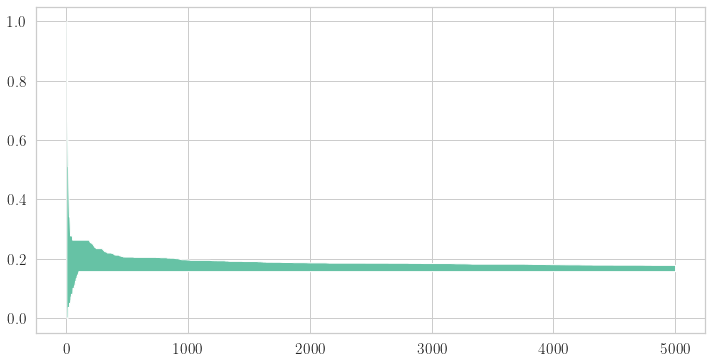

In [139]:
plt.fill_between(x=np.arange(5000),y1=np.maximum(low,0),y2=np.minimum(up,1))

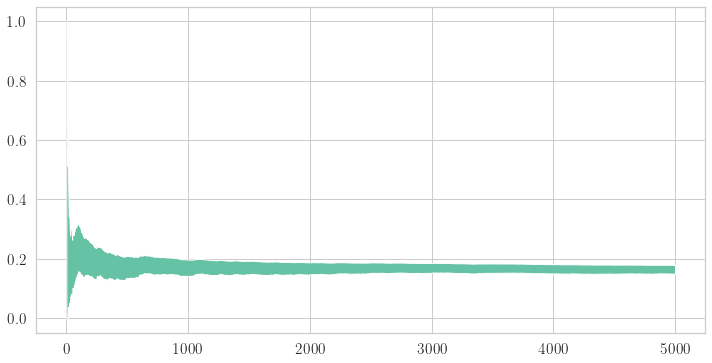

In [136]:
plt.fill_between(x=np.arange(5000),y1=np.maximum(low,0),y2=np.minimum(up,1))

In [141]:
from utils.concentrations import compute_pm_hoeffding_upper_limit, compute_pm_hoeffding_lower_limit

In [152]:
low_h = compute_pm_hoeffding_lower_limit(z,0.05)
up_h = compute_pm_hoeffding_upper_limit(z,0.05)

(0.0, 0.4)

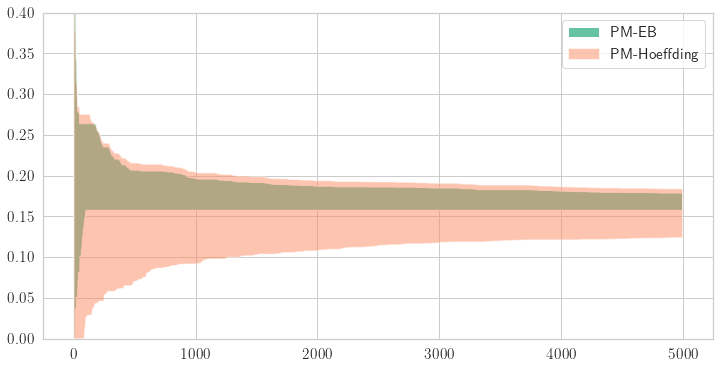

In [157]:
plt.fill_between(x=np.arange(5000),y1=np.maximum(low,0),y2=np.minimum(up,1), label='PM-EB')
plt.fill_between(x=np.arange(5000),y1=np.maximum(low_h,0),y2=np.minimum(up_h,1),alpha=0.5, label='PM-Hoeffding')
plt.legend()
plt.ylim([0,0.4])

# Sanity checks for concentrations

In [75]:
n=1000
p=0.8

In [80]:
seq = np.random.binomial(1,p,size=n)

In [81]:
low = compute_pm_bernstein_lower_limit(seq,0.05, take_run_inter=False)
up = compute_pm_bernstein_upper_limit(seq,0.05, take_run_inter=False)
low_int = compute_pm_bernstein_lower_limit(seq,0.05, take_run_inter=True)
up_int = compute_pm_bernstein_upper_limit(seq,0.05, take_run_inter=True)

In [82]:
low_h = compute_pm_hoeffding_lower_limit(seq,0.05, take_run_inter=False)
up_h = compute_pm_hoeffding_upper_limit(seq,0.05, take_run_inter=False)
low_h_int = compute_pm_hoeffding_lower_limit(seq,0.05, take_run_inter=True)
up_h_int = compute_pm_hoeffding_upper_limit(seq,0.05, take_run_inter=True)

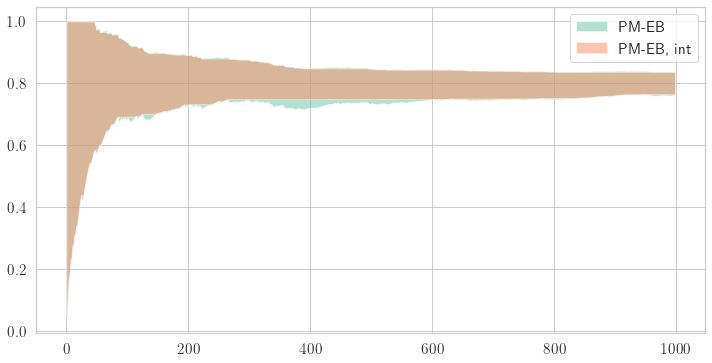

In [83]:
plt.fill_between(x=np.arange(n),
                 y1=np.maximum(low, 0),
                 y2=np.minimum(up, 1),
                 alpha=0.5,
                 label='PM-EB')
# plt.fill_between(x=np.arange(n),y1=np.maximum(low_h,0),y2=np.minimum(up_h,1),alpha=0.5, label='PM-Hoeffding')
plt.fill_between(x=np.arange(n),
                 y1=np.maximum(low_int, 0),
                 y2=np.minimum(up_int, 1),
                 alpha=0.5,
                 label='PM-EB, int')
# plt.fill_between(x=np.arange(n),y1=np.maximum(low_h_int,0),y2=np.minimum(up_h_int,1),alpha=0.5, label='PM-Hoeffding, int')
plt.legend()
#plt.ylim([0,0.4])

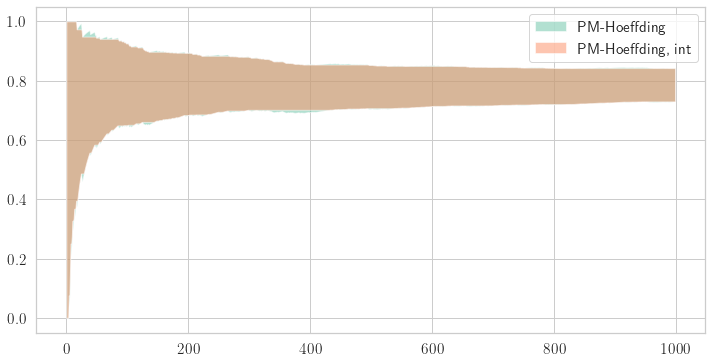

In [84]:
# plt.fill_between(x=np.arange(n),y1=np.maximum(low,0),y2=np.minimum(up,1),alpha=0.5, label='PM-EB')
plt.fill_between(x=np.arange(n),
                 y1=np.maximum(low_h, 0),
                 y2=np.minimum(up_h, 1),
                 alpha=0.5,
                 label='PM-Hoeffding')
# plt.fill_between(x=np.arange(n),y1=np.maximum(low_int,0),y2=np.minimum(up_int,1),alpha=0.5, label='PM-EB, int')
plt.fill_between(x=np.arange(n),
                 y1=np.maximum(low_h_int, 0),
                 y2=np.minimum(up_h_int, 1),
                 alpha=0.5,
                 label='PM-Hoeffding, int')
plt.legend()
#plt.ylim([0,0.4])

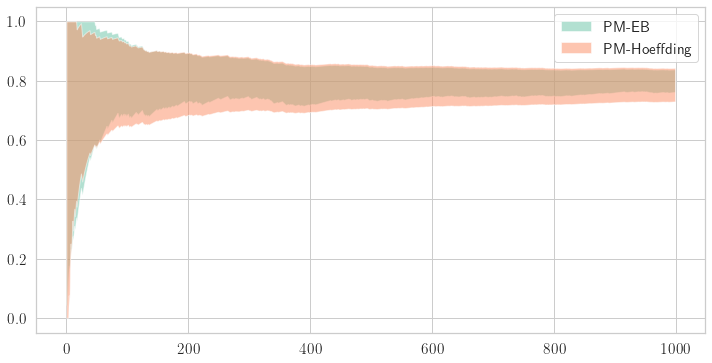

In [85]:
plt.fill_between(x=np.arange(n),
                 y1=np.maximum(low, 0),
                 y2=np.minimum(up, 1),
                 alpha=0.5,
                 label='PM-EB')
plt.fill_between(x=np.arange(n),
                 y1=np.maximum(low_h, 0),
                 y2=np.minimum(up_h, 1),
                 alpha=0.5,
                 label='PM-Hoeffding')
# plt.fill_between(x=np.arange(n),y1=np.maximum(low_int,0),y2=np.minimum(up_int,1),alpha=0.5, label='PM-EB, int')
# plt.fill_between(x=np.arange(n),y1=np.maximum(low_h_int,0),y2=np.minimum(up_h_int,1),alpha=0.5, label='PM-Hoeffding, int')
plt.legend()
#plt.ylim([0,0.4])

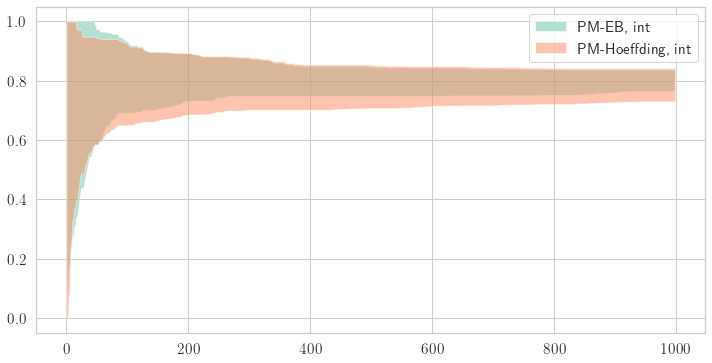

In [86]:
# plt.fill_between(x=np.arange(n),y1=np.maximum(low,0),y2=np.minimum(up,1),alpha=0.5, label='PM-EB')
# plt.fill_between(x=np.arange(n),y1=np.maximum(low_h,0),y2=np.minimum(up_h,1),alpha=0.5, label='PM-Hoeffding')
plt.fill_between(x=np.arange(n),
                 y1=np.maximum(low_int, 0),
                 y2=np.minimum(up_int, 1),
                 alpha=0.5,
                 label='PM-EB, int')
plt.fill_between(x=np.arange(n),
                 y1=np.maximum(low_h_int, 0),
                 y2=np.minimum(up_h_int, 1),
                 alpha=0.5,
                 label='PM-Hoeffding, int')
plt.legend()
#plt.ylim([0,0.4])